Amazon Reviews Scraper (using Requests & BeautifulSoup)


In [1]:
from bs4 import BeautifulSoup
import requests

In [ ]:
#AMAZON product ID: B0CJBQBB7F

Walmart Reviews Scraper (using ZenRows API)


In [ ]:
import 

In [1]:
import requests
import json
import time

def scrape_walmart_reviews(product_url, brand_name, api_key, max_pages):
    zenrows_url = "https://ecommerce.api.zenrows.com/v1/targets/walmart/reviews/"
    params = {
        "apikey": api_key,
        "url": product_url,
        "tld": ".com"
    }

    all_reviews = []
    current_url = product_url
    page = 0

    while current_url and page < max_pages:
        print(f"📄 Scraping page {page + 1} for {brand_name}...")
        params["url"] = current_url
        response = requests.get(zenrows_url, params=params)

        if response.status_code != 200:
            print(f"⚠️ Error on page {page + 1}: {response.status_code}")
            break

        data = response.json()
        reviews = data.get("product_reviews_list", [])
        for r in reviews:
            r["brand"] = brand_name
            all_reviews.append(r)

        current_url = data.get("pagination", {}).get("next_page")
        page += 1
        time.sleep(1)

    print(f"✅ Done: {len(all_reviews)} reviews collected for {brand_name}")
    return all_reviews

In [3]:
api_key = '7c5ba8632036720ff743537eb5abdee6d2160188'
#add more products from Walmart
products = {
    "JIUMESS": "https://www.walmart.com/reviews/product/3319869184",
    "INIU": "https://www.walmart.com/reviews/product/1622294867",   # replace with real URL
    "Anker": "https://www.walmart.com/reviews/product/5332703890"  # replace with real URL
}
MAX_PAGES = 20
combined_reviews = []

for brand, url in products.items():
    reviews = scrape_walmart_reviews(url, brand, api_key, max_pages = MAX_PAGES)
    combined_reviews.extend(reviews)

📄 Scraping page 1 for JIUMESS...
📄 Scraping page 2 for JIUMESS...
📄 Scraping page 3 for JIUMESS...
📄 Scraping page 4 for JIUMESS...
📄 Scraping page 5 for JIUMESS...
📄 Scraping page 6 for JIUMESS...
📄 Scraping page 7 for JIUMESS...
📄 Scraping page 8 for JIUMESS...
📄 Scraping page 9 for JIUMESS...
📄 Scraping page 10 for JIUMESS...
📄 Scraping page 11 for JIUMESS...
📄 Scraping page 12 for JIUMESS...
📄 Scraping page 13 for JIUMESS...
📄 Scraping page 14 for JIUMESS...
📄 Scraping page 15 for JIUMESS...
📄 Scraping page 16 for JIUMESS...
📄 Scraping page 17 for JIUMESS...
📄 Scraping page 18 for JIUMESS...
📄 Scraping page 19 for JIUMESS...
📄 Scraping page 20 for JIUMESS...
✅ Done: 200 reviews collected for JIUMESS
📄 Scraping page 1 for INIU...
📄 Scraping page 2 for INIU...
📄 Scraping page 3 for INIU...
📄 Scraping page 4 for INIU...
📄 Scraping page 5 for INIU...
📄 Scraping page 6 for INIU...
📄 Scraping page 7 for INIU...
📄 Scraping page 8 for INIU...
📄 Scraping page 9 for INIU...
📄 Scraping page 1

In [7]:
# Save raw reviews to file
with open("walmart_powerbank_reviews_raw.json", "w", encoding="utf-8") as f:
    json.dump(combined_reviews, f, indent=2, ensure_ascii=False)

print("📁 Saved raw reviews to walmart_powerbank_reviews_raw.json")


📁 Saved raw reviews to walmart_powerbank_reviews_raw.json


In [11]:
import json

with open("walmart_powerbank_reviews_raw.json", "r", encoding="utf-8") as f:
    combined_reviews = json.load(f)

print(f"✅ Loaded {len(combined_reviews)} reviews from file.")

✅ Loaded 413 reviews from file.


In [38]:
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer

# Optional: Fix pandas first if it was broken before
# !pip install --force-reinstall pandas

# Clean function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return re.sub(r"\s+", " ", text).strip()

# Sentiment analyzer
sia = SentimentIntensityAnalyzer()

records = []

for r in combined_reviews:
    raw = r.get("review_content", "")
    cleaned = clean_text(raw)
    sentiment = sia.polarity_scores(cleaned)["compound"]
    
    records.append({
        "brand": r.get("brand", "unknown"),
        "review_title": r.get("review_title", ""),
        "review_content": raw,
        "cleaned_text": cleaned,
        "sentiment_score": sentiment,
        "review_rating": float(r.get("review_rating", 0)),  # ⭐ Add this line
        "helpful_votes": r.get("helpful_votes", 0)
    })

df = pd.DataFrame(records)
print(f"✅ Created DataFrame with {len(df)} reviews")


✅ Created DataFrame with 413 reviews


In [40]:
import pandas as pd
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import defaultdict

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Load data
#df = pd.read_csv("walmart_powerbank_insights.csv")

# Clean function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return re.sub(r"\s+", " ", text).strip()

df["cleaned_text"] = df["review_content"].apply(clean_text)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
df["sentiment_score"] = df["cleaned_text"].apply(lambda x: sia.polarity_scores(x)["compound"])


In [54]:
categories = {
    "use_case": ["travel", "trip", "camping", "emergency", "jacket", "vest", "gift", "car", "purse", "backpack"],
    "favorite_function": ["fast charge", "lightweight", "cord", "built in", "compact", "multiple", "usb", "lasts long", "portable", "ready", "reliable"],
    "concerns": ["heavy", "bulky", "broke", "stopped", "drain", "slow", "not happy", "didn't work", "short cord", "took forever"]
}


In [56]:
def detect_tags(text, categories):
    tags = []
    for category, keywords in categories.items():
        for k in keywords:
            if k in text:
                tags.append(category)
                break  # prevent duplicates
    return ", ".join(tags) if tags else "neutral"

df["tags"] = df["cleaned_text"].apply(lambda x: detect_tags(x, categories))


In [58]:
df.to_csv("walmart_powerbank_review_insights_final.csv", index=False)
print("✅ Final insights saved to walmart_powerbank_review_insights_final.csv")


✅ Final insights saved to walmart_powerbank_review_insights_final.csv


In [60]:
from statistics import mean

for cat in ["use_case", "favorite_function", "concerns"]:
    filtered = df[df["tags"].str.contains(cat)]
    if not filtered.empty:
        avg_sent = mean(filtered["sentiment_score"])
        print(f"🔍 {cat.upper()} — Mentions: {len(filtered)} | Avg Sentiment: {avg_sent:.2f}")
        print(f"   Sample: {filtered.iloc[0]['review_content'][:150]}...\n")


🔍 USE_CASE — Mentions: 59 | Avg Sentiment: 0.51
   Sample: The JIUMESS 20000mAh Power Bank Portable Charger is an absolute lifesaver for anyone on the go. With its massive capacity, I never have to worry about...

🔍 FAVORITE_FUNCTION — Mentions: 108 | Avg Sentiment: 0.51
   Sample: The JIUMESS 20000mAh Power Bank Portable Charger is an absolute lifesaver for anyone on the go. With its massive capacity, I never have to worry about...

🔍 CONCERNS — Mentions: 51 | Avg Sentiment: 0.22
   Sample: So this was gonna be great because it has a cord so I won't have to search for them and all our phones and our stereo will be covered well within the ...



/var/folders/_p/rk85mrcx3d15043y2jb_2d0w0000gn/T/ipykernel_70294/1498118560.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


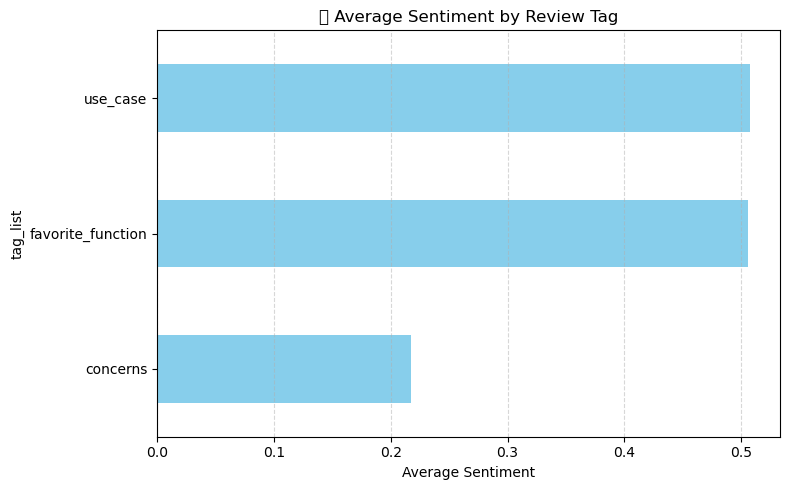

In [62]:
import matplotlib.pyplot as plt

# Split tags into multiple rows
exploded = df[df["tags"] != "neutral"].copy()
exploded["tag_list"] = exploded["tags"].str.split(", ")
exploded = exploded.explode("tag_list")

# Group by tag and calculate average sentiment
tag_sentiment = exploded.groupby("tag_list")["sentiment_score"].mean().sort_values()

# Plot
plt.figure(figsize=(8, 5))
tag_sentiment.plot(kind="barh", color="skyblue")
plt.xlabel("Average Sentiment")
plt.title("📊 Average Sentiment by Review Tag")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


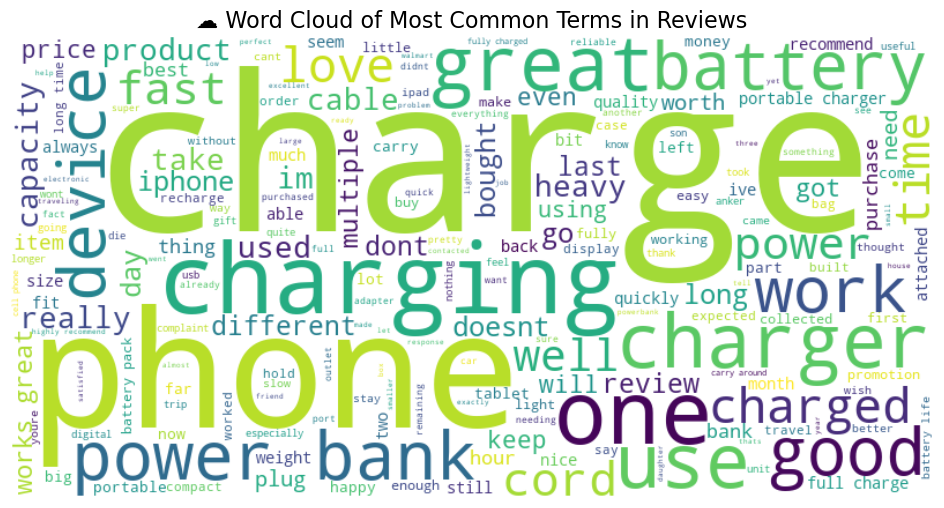

In [64]:
from wordcloud import WordCloud

# Combine all cleaned review text
text_blob = " ".join(df["cleaned_text"].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_blob)

# Display it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("☁️ Word Cloud of Most Common Terms in Reviews", fontsize=16)
plt.show()


In [66]:
use_case_df = df[df["tags"].str.contains("use_case")].sort_values("sentiment_score", ascending=False)

print(f"🧳 Top Use Cases from {len(use_case_df)} mentions:\n")

for i, row in use_case_df.head(5).iterrows():
    print(f"• {row['review_content'][:200]}...\n")


🧳 Top Use Cases from 59 mentions:

• I use delivery apps, which drain my phone's battery very quickly. I didn't want to use my car charger and affect my car's battery, so I thought I'd order this portable charger, after reading the posit...

• Perfect! Second one I order. Gifted the second one to a friend. It's my backup when I leave the house. Keep it in my purse. All plugs attached and ready to go. I got this last one sale. Win win!...

• [This review was collected as part of a promotion.] This thing has SO MUCH charging power, I keep it in my car for emergencies now, but I used it for a bit to see the capabilities and boy does it work...

• The JIUMESS 20000mAh Power Bank Portable Charger is an absolute lifesaver for anyone on the go. With its massive capacity, I never have to worry about running out of battery on my phone or other devic...

• I'm really happy this power bank. it's small, portbale with a soft carry case, lightweight, charges itself and devices w fast charge, can cha

In [68]:
#knowledge-based use case extraction
use_case_keywords = [
    "phone", "tablet", "earbuds", "laptop",  # devices
    "travel", "camping", "road trip", "emergency", "hiking", "commute",
    "gift", "car", "purse", "backpack", "vest", "heated vest", "outdoor"
]

df["use_case_mentions"] = df["cleaned_text"].apply(
    lambda text: ", ".join([kw for kw in use_case_keywords if kw in text]) or "other"
)

df["use_case_mentions"].value_counts()


other                                 270
phone                                  78
car                                    12
travel                                 11
phone, car                              5
gift                                    4
phone, tablet                           4
camping                                 2
phone, travel                           2
tablet                                  2
emergency                               2
phone, purse                            2
outdoor                                 2
phone, vest, heated vest                1
gift, purse                             1
phone, earbuds, laptop                  1
phone, emergency                        1
phone, tablet, road trip                1
phone, gift                             1
phone, earbuds, car                     1
phone, earbuds                          1
travel, car                             1
phone, gift, car                        1
phone, camping, hiking, car       

In [70]:
#Noun Phrase Extraction with NLP
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_noun_phrases(text):
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks if len(chunk.text.split()) <= 4]

df["noun_phrases"] = df["cleaned_text"].apply(extract_noun_phrases)


In [72]:
from collections import Counter

all_phrases = sum(df["noun_phrases"].tolist(), [])
common_phrases = Counter(all_phrases).most_common(30)

for phrase, count in common_phrases:
    print(f"{phrase:30} {count}")


it                             414
i                              392
this                           74
you                            59
my phone                       47
that                           45
they                           28
me                             26
we                             19
the power bank                 17
this power bank                15
he                             15
its                            13
what                           12
this charger                   12
part                           12
my iphone                      11
this review                    11
a promotion                    11
the go                         9
a long time                    9
a charge                       9
them                           9
which                          9
power                          8
this product                   8
charges                        8
the battery                    8
itself                         8
something             

In [74]:
#Automatic Topic Discovery with BERTopic
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

model = BERTopic(embedding_model="all-MiniLM-L6-v2")
topics, _ = model.fit_transform(df["cleaned_text"].tolist())

df["topic"] = topics
model.get_topic_info()  # List of discovered use case/topic themes


,Topic,Count,Name,Representation,Representative_Docs
0,-1,14,-1_the_it_to_and,"[the, it, to, and, but, of, this, power, its, ...",[i bought it two years ago and used it for my ...
1,0,241,0_it_the_and_to,"[it, the, and, to, my, charge, is, for, this, ...",[i love the fact that it has the different cor...
2,1,71,1_it_product_the_to,"[it, product, the, to, great, good, very, for,...",[so far it has been working fine the texture i...
3,2,57,2_bank_power_to_the,"[bank, power, to, the, this, my, and, it, is, ...",[this review was collected as part of a promot...
4,3,30,3_it_not_charge_working,"[it, not, charge, working, after, stopped, wil...","[it does not work it charge up but not out, it..."


<b> Customer Sentiment Analysis </b> 

In [84]:
# Classify sentiment from VADER score
def classify_sentiment(score):
    if score >= 0.2:
        return "positive"
    elif score <= -0.2:
        return "negative"
    else:
        return "neutral"

df["sentiment_label"] = df["sentiment_score"].apply(classify_sentiment)

# Classify rating as well (1-2 = neg, 3 = neutral, 4-5 = pos)
def classify_rating(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["rating_label"] = df["review_rating"].apply(classify_rating)

# How often do sentiment and rating agree?
alignment = (df["sentiment_label"] == df["rating_label"])
agreement_rate = alignment.mean()
print(f"✅ Sentiment/Rating Agreement: {agreement_rate:.2%}")

✅ Sentiment/Rating Agreement: 15.25%


In [90]:
#analyze sentiment
from transformers import pipeline
model = pipeline("sentiment-analysis")

# Apply to reviews
df["bert_sentiment"] = df["review_content"].apply(lambda x: model(x[:512])[0]["label"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [92]:
# Clean labels
df["bert_sentiment_clean"] = df["bert_sentiment"].str.lower()

# Agreement check
alignment = df["bert_sentiment_clean"] == df["rating_label"]
print(f"✅ BERT Sentiment/Rating Agreement: {alignment.mean():.2%}")


✅ BERT Sentiment/Rating Agreement: 41.40%


In [96]:
# Count sentiment
sentiment_counts = df["bert_sentiment_clean"].value_counts()
print("📊 Sentiment Distribution:\n", sentiment_counts)

# Show examples
for label in ["positive", "negative"]:
    print(f"\n🔍 Example {label.capitalize()} Review:")
    print(df[df["sentiment_label"] == label]["review_content"].iloc[0])

📊 Sentiment Distribution:
 positive    242
negative    171
Name: bert_sentiment_clean, dtype: int64

🔍 Example Positive Review:
The JIUMESS 20000mAh Power Bank Portable Charger is an absolute lifesaver for anyone on the go. With its massive capacity, I never have to worry about running out of battery on my phone or other devices again. The inclusion of built-in cables for easy charging means I can leave the house fully equipped without needing to carry extra cords. The USB fast charging capabilities ensure that my devices are juiced up quickly, even when I'm in a rush. Plus, its compact size makes it perfect for tossing into my bag or pocket when I'm out and about. Overall, this power bank has become an essential accessory for keeping my devices powered up wherever I am.

🔍 Example Negative Review:
my boys tend to fight as soon as their phones/tablets die (especially on road trips.)
this has been a godsend, and it charges their devices multiple times before needing recharged


<b> Use Case Analysis </b>

In [151]:
#old
#use_case_keywords = {
#    "travelers": ["travel", "trip", "road trip", "airport", "flight", "hotel"],
#    "professionals": ["work", "office", "meeting", "business", "laptop", "day long"],
#    "outdoor_enthusiasts": ["camping", "hiking", "backpacking", "outdoor", "gps", "emergency"]
#}

#new
use_case_keywords.update({
    "parents": ["my son", "my kids", "children", "family", "tablet", "multiple devices"],
    "students": ["school bag", "backpack", "class", "student", "college"],
    "commuters": ["on the go", "train", "bus", "car ride", "subway", "commute"],
    "apple_users": ["iphone", "ipad", "lightning", "apple device"],
    "multi_device_users": ["my devices", "work phone", "tablet", "earbuds"],
    "emergency_preparedness": ["power outage", "emergency", "blackout", "storm"]
})

In [153]:
# detect use cases
def detect_use_cases(text):
    cases = []
    for label, keywords in use_case_keywords.items():
        if any(k in text for k in keywords):
            cases.append(label)
    return ", ".join(cases) if cases else "other"

df["use_case_segment"] = df["cleaned_text"].apply(detect_use_cases)

# Count + preview
print("📊 Use Case Distribution:\n", df["use_case_segment"].value_counts())

df[["review_content", "use_case_segment"]].head(5)


📊 Use Case Distribution:
 other                                                                      262
professionals                                                               74
travelers                                                                   14
apple_users                                                                  9
parents                                                                      7
professionals, apple_users                                                   5
emergency_preparedness                                                       3
multi_device_users                                                           3
professionals, parents, multi_device_users                                   3
commuters                                                                    3
parents, multi_device_users                                                  3
travelers, professionals                                                     2
outdoor_enthusiasts       

,review_content,use_case_segment
0,The JIUMESS 20000mAh Power Bank Portable Charg...,"commuters, multi_device_users"
1,This power bank came fully charged and ready t...,multi_device_users
2,This little item is something else! It holds a...,other
3,I can charge all of the electronics that I car...,"professionals, multi_device_users"
4,Loved these! Quality. Small size. Handy with a...,other


<b> Pain point analysis </b>


In [157]:
#defined pain points
pain_points = {
    "charging_speed": ["slow", "charging time", "took forever", "hours", "long time"],
    "reliability": ["broken", "stopped", "defect", "recall", "didn’t work", "dead", "faulty"],
    "weight": ["heavy", "bulky", "too big", "not portable", "large"]
}

In [158]:
#detect pain points
def detect_pains(text):
    tags = []
    for label, keywords in pain_points.items():
        if any(k in text for k in keywords):
            tags.append(label)
    return ", ".join(tags) if tags else "none"

df["pain_points"] = df["cleaned_text"].apply(detect_pains)

# Count + examples
print("📉 Pain Points Summary:\n", df["pain_points"].value_counts())

for pain in ["charging_speed", "reliability", "weight"]:
    sample = df[df["pain_points"].str.contains(pain)].iloc[0]["review_content"]
    print(f"\n🛑 {pain.capitalize()} Sample:\n{sample}")


📉 Pain Points Summary:
 none                      338
charging_speed             33
weight                     28
reliability                11
charging_speed, weight      3
Name: pain_points, dtype: int64

🛑 Charging_speed Sample:
This power bank came fully charged and ready to go right out of the box. I especially love the attached charging cords that I can plug directly into my device without having to use my charging cable. Charge lasts a long time and it's great being able to power my devices without worrying about my proximity to an outlet.

🛑 Reliability Sample:
Really cool 20,00 phone brick charger   Will power up my phone from almost dead to 100% three times before I need to recharge. 
Really like that all 4 cords are connected to the charging brick.

🛑 Weight Sample:
Nice backup battery.  I used it to recharge my cell 4 or 5 times before having to recharge it. Has a nice digital readout showing power used %26 left. It's heavy, but well made, and I really like the attached %26

In [167]:
#Sentiment overlap check

# If "pain_points" column is a comma-separated string, convert it to a list
def safe_split(x):
    if isinstance(x, str):
        return [tag.strip() for tag in x.split(",")]
    return x

df["pain_points"] = df["pain_points"].apply(safe_split)

from collections import defaultdict

pain_point_sentiments = defaultdict(list)

for _, row in df.iterrows():
    for tag in row["pain_points"]:
        pain_point_sentiments[tag].append(row["sentiment_score"])

avg_pain_sentiment = {k: sum(v)/len(v) for k, v in pain_point_sentiments.items()}

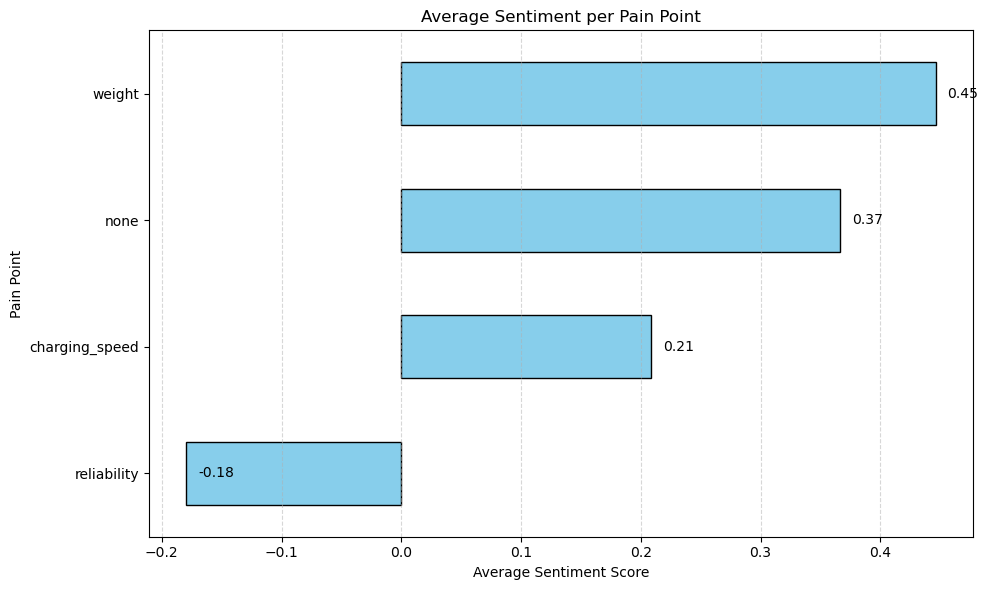

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

sentiment_series = pd.Series(avg_pain_sentiment).sort_values()

plt.figure(figsize=(10, 6))
sentiment_series.plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Average Sentiment per Pain Point")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Pain Point")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Label the bars
for index, value in enumerate(sentiment_series.values):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()


<b> Features people love </b>

In [175]:
#Define Feature Keywords
feature_keywords = {
    "built_in_cables": ["built-in cable", "attached cable", "cables included"],
    "capacity": ["20000mah", "capacity", "lasts long", "holds charge"],
    "fast_charging": ["fast charge", "quick charge", "charging speed"],
    "compact_size": ["compact", "small", "pocket", "portable", "lightweight"],
    "multi_device_support": ["multiple devices", "charge more than one", "multiple ports"],
    "reliability": ["solid", "works great", "no issues", "dependable"],
    "value_for_money": ["worth it", "great deal", "price", "affordable"]
}


In [177]:
#Tag Each Review with Loved Features
def detect_features(text):
    text = text.lower()
    features = []
    for label, keywords in feature_keywords.items():
        if any(k in text for k in keywords):
            features.append(label)
    return features if features else ["other"]

df["loved_features"] = df["cleaned_text"].apply(detect_features)


In [179]:
#Analyze Average Sentiment per Feature
from collections import defaultdict

feature_sentiments = defaultdict(list)

for _, row in df.iterrows():
    for feature in row["loved_features"]:
        feature_sentiments[feature].append(row["sentiment_score"])

avg_feature_sentiment = {k: sum(v)/len(v) for k, v in feature_sentiments.items()}


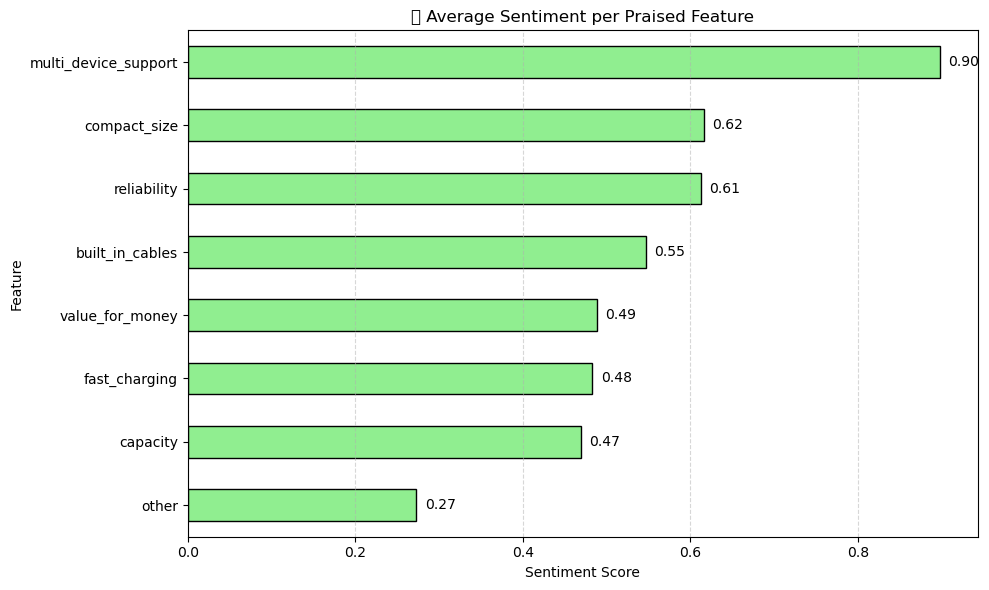

In [181]:
#visulize

series = pd.Series(avg_feature_sentiment).sort_values()

plt.figure(figsize=(10, 6))
series.plot(kind="barh", color="lightgreen", edgecolor="black")
plt.title("💚 Average Sentiment per Praised Feature")
plt.xlabel("Sentiment Score")
plt.ylabel("Feature")
for i, val in enumerate(series.values):
    plt.text(val + 0.01, i, f"{val:.2f}", va='center')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 save files 

In [104]:
df.to_csv("walmart_review_insights.csv", index=False)

In [144]:
#Extract Noun Phrases from “other” Reviews
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Extract "other" reviews
other_reviews = df[df["use_case_segment"] == "other"]["cleaned_text"].dropna().astype(str).tolist()

# Get noun phrases
def get_noun_phrases(text):
    return [chunk.text.lower() for chunk in nlp(text).noun_chunks]

all_phrases = []
for review in other_reviews:
    all_phrases.extend(get_noun_phrases(review))

# Count most common phrases
phrase_counts = Counter(all_phrases)
print("🧠 Top Noun Phrases in 'Other' Reviews:")
for phrase, count in phrase_counts.most_common(30):
    print(f"{phrase:<30} {count}")

🧠 Top Noun Phrases in 'Other' Reviews:
it                             259
i                              257
this                           47
you                            41
my phone                       34
that                           28
they                           16
the power bank                 13
me                             12
we                             11
this power bank                10
what                           10
he                             10
this charger                   9
this product                   8
a long time                    7
power                          7
the battery                    7
itself                         7
which                          7
the go                         6
the price                      6
everything                     6
my son                         6
my iphone                      6
my devices                     5
these                          5
charges                        5
this one              

In [146]:
# Define filters to ignore
ignore_phrases = {"i", "it", "this", "that", "you", "they", "me", "he", "we", "what", "which", "these", "its"}

filtered_phrases = [(phrase, count) for phrase, count in phrase_counts.items()
                    if phrase not in ignore_phrases and len(phrase.split()) >= 2]

# Sort and preview
for phrase, count in sorted(filtered_phrases, key=lambda x: -x[1])[:20]:
    print(f"{phrase:<30} {count}")


my phone                       34
the power bank                 13
this power bank                10
this charger                   9
this product                   8
a long time                    7
the battery                    7
the go                         6
the price                      6
my son                         6
my iphone                      6
my devices                     5
this one                       5
this item                      5
other devices                  4
the house                      4
the device                     4
the charge                     4
my purchase                    4
the bank                       4


In [148]:
#Extract New Categories with Co-Occurrences
for phrase in ["my son", "the go", "my iphone"]:
    print(f"\n📍 Reviews mentioning '{phrase}':")
    matches = df[df["cleaned_text"].str.contains(phrase)]
    for i, row in matches.head(3).iterrows():
        print(f"🔹 {row['cleaned_text'][:200]}...")


📍 Reviews mentioning 'my son':
🔹 this was a gift for my son he loves everything about it...
🔹 i love this thing it charges fast and does not lose its charge as fast as many others my son lost it on our trip and i bought a different one from the store and its not even remotely the same quality ...
🔹 my son has one of these that he has been using for a long time he really likes it i have not needed to use mine yet but its nice to know its there...

📍 Reviews mentioning 'the go':
🔹 the jiumess 20000mah power bank portable charger is an absolute lifesaver for anyone on the go with its massive capacity i never have to worry about running out of battery on my phone or other devices...
🔹 maybe i got a dud because my purchase does not come close to the good reviews of this product it takes forever to charge but then it runs down so fast perhaps i expected too much for 20 lol i definite...
🔹 great for on the go charging...

📍 Reviews mentioning 'my iphone':
🔹 i was able to charge my iphone no 

In [130]:
#View Top Topics
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))


ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [110]:
#inspect topic and key word
for topic_id in topic_info["Topic"].head(5):
    if topic_id != -1:
        print(f"\n🧠 Topic {topic_id}:")
        for word, weight in topic_model.get_topic(topic_id):
            print(f" - {word}")



🧠 Topic 0:
 - it
 - and
 - the
 - is
 - to
 - battery
 - for
 - my
 - heavy
 - of

🧠 Topic 1:
 - product
 - it
 - to
 - great
 - good
 - the
 - for
 - very
 - has
 - and

🧠 Topic 2:
 - it
 - to
 - charge
 - charges
 - my
 - phone
 - works
 - the
 - charger
 - times

🧠 Topic 3:
 - bank
 - power
 - the
 - to
 - this
 - my
 - and
 - it
 - is
 - for


In [116]:
#Extract Noun Phrases
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_noun_phrases(text):
    doc = nlp(text)
    return [chunk.text.lower() for chunk in doc.noun_chunks if 1 < len(chunk.text.split()) <= 4]

df["noun_phrases"] = df["cleaned_text"].apply(extract_noun_phrases)


In [114]:
#Count Most Common Phrases
from collections import Counter

all_phrases = sum(df["noun_phrases"], [])
common_phrases = Counter(all_phrases).most_common(30)

for phrase, count in common_phrases:
    print(f"{phrase:<30} {count}")


my phone                       47
the power bank                 17
this power bank                15
this charger                   12
my iphone                      11
this review                    11
a promotion                    11
the go                         9
a long time                    9
a charge                       9
this product                   8
the battery                    8
this one                       7
my son                         7
the unit                       7
other devices                  6
a lot                          6
the price                      6
the fact                       6
a while                        6
the charger                    6
a month                        6
my devices                     5
your device                    5
one charge                     5
this item                      5
the house                      4
the box                        4
a cord                         4
the product                    4


In [44]:
#another method: direct scraping
import requests
from bs4 import BeautifulSoup

target_url="https://www.amazon.com/dp/B0CJBQBB7F?th=1"

response = requests.get(target_url)

In [38]:
# check if the response status code is not 200 (OK)
if response.status_code != 200:
   # print an error message with the status code
   print(f"An error occurred with status {response.status_code}")
else:
   # get the page html content
   html_content = response.text
  
   # parse the html content using BeautifulSoup
   soup = BeautifulSoup(html_content, "html.parser")
  
   # print the parsed HTML in a readable format
   print(soup.prettify())

An error occurred with status 500
